# Type A Models Only Filter_Str used

In [9]:
import sklearn
import pandas
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

In [10]:
data = pandas.read_csv("../Dataset/final.csv",usecols=['filter_str','label'])
data.head()

,filter_str,label
0,"{'user': '{}', 'password': '{}'}",0.0
1,"{'user': '{}', 'password': '{}'}",0.0
2,{'username': {'$regex': '^{}'}},1.0
3,{'username': {'$regex': '^{}'}},1.0
4,{'username': {'$ne': '{}'}},1.0


In [11]:
features = data['filter_str']
target = data['label']

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
featuresVect = vectorizer.fit_transform(features)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featuresVect, target, test_size=0.2)

In [14]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

svm_A_liner = SVC(kernel="linear",verbose=1)
svm_A_poly = SVC(kernel="poly",verbose=1)
svm_A_rbf = SVC(kernel="rbf",verbose=1)
svm_A_sig = SVC(kernel="sigmoid",verbose=1)
log_A = LogisticRegression(verbose=1)
randF_A = RandomForestClassifier(verbose=1)
gbc_A = GradientBoostingClassifier(verbose=1)
knn = KNeighborsClassifier(n_neighbors=7)
dt_clf = DecisionTreeClassifier()
bag_dt = BaggingClassifier()
ada_dt = AdaBoostClassifier()
vote = VotingClassifier
bayes = MultinomialNB()

In [15]:
svm_A_liner.fit(X_train,y_train)
svm_A_poly.fit(X_train,y_train)
svm_A_rbf.fit(X_train,y_train)
svm_A_sig.fit(X_train,y_train)
log_A.fit(X_train,y_train)
randF_A.fit(X_train,y_train)
gbc_A.fit(X_train,y_train)
knn.fit(X_train,y_train)
dt_clf.fit(X_train,y_train)
bag_dt.fit(X_train,y_train)
ada_dt.fit(X_train,y_train)

bayes.fit(X_train,y_train)

[LibSVM]*
optimization finished, #iter = 169
obj = -78.853738, rho = -0.176324
nSV = 125, nBSV = 82
Total nSV = 125
[LibSVM]*.*
optimization finished, #iter = 179
obj = -60.657716, rho = -0.069194
nSV = 123, nBSV = 39
Total nSV = 123
[LibSVM]*
optimization finished, #iter = 139
obj = -71.755358, rho = 0.285723
nSV = 129, nBSV = 81
Total nSV = 129
[LibSVM].*.*
optimization finished, #iter = 396
obj = -93.862746, rho = 0.007591
nSV = 129, nBSV = 99
Total nSV = 129
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          127     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.24073D+02    |proj g|=  5.50000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected

 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


        20           0.8546            0.09s
        30           0.7521            0.08s
        40           0.6848            0.07s
        50           0.6272            0.06s
        60           0.5810            0.04s
        70           0.5419            0.03s
        80           0.5075            0.02s
        90           0.4774            0.01s
       100           0.4525            0.00s


MultinomialNB()

Classification Report for Linear SVM:
              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77        25
         1.0       0.70      0.80      0.74        20

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45

Classification Report for Poly SVM:
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        25
         1.0       0.78      0.70      0.74        20

    accuracy                           0.78        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.78      0.78      0.78        45

Classification Report for RBF SVM:
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.82        25
         1.0       0.79      0.75      0.77        20

    accuracy                           0.80        45
   macro avg       

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Classification Report for Decsion Tree:
              precision    recall  f1-score   support

         0.0       0.81      0.68      0.74        25
         1.0       0.67      0.80      0.73        20

    accuracy                           0.73        45
   macro avg       0.74      0.74      0.73        45
weighted avg       0.75      0.73      0.73        45

Classification Report for Bagging:
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73        25
         1.0       0.67      0.70      0.68        20

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.71      0.71        45

Classification Report for Adaboost:
              precision    recall  f1-score   support

         0.0       0.79      0.76      0.78        25
         1.0       0.71      0.75      0.73        20

    accuracy                           0.76        45
   macro avg     

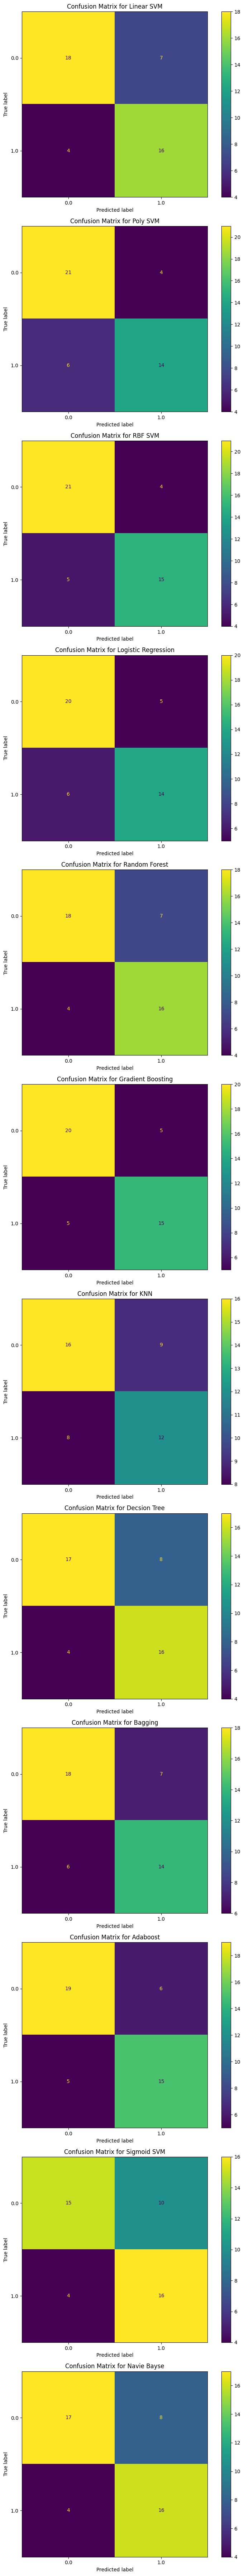

                  Model  Accuracy  Precision  Recall        F1
0            Linear SVM  0.755556   0.695652    0.80  0.744186
1              Poly SVM  0.777778   0.777778    0.70  0.736842
2               RBF SVM  0.800000   0.789474    0.75  0.769231
3   Logistic Regression  0.755556   0.736842    0.70  0.717949
4         Random Forest  0.755556   0.695652    0.80  0.744186
5     Gradient Boosting  0.777778   0.750000    0.75  0.750000
6                   KNN  0.622222   0.571429    0.60  0.585366
7          Decsion Tree  0.733333   0.666667    0.80  0.727273
8               Bagging  0.711111   0.666667    0.70  0.682927
9              Adaboost  0.755556   0.714286    0.75  0.731707
10          Sigmoid SVM  0.688889   0.615385    0.80  0.695652
11          Navie Bayse  0.733333   0.666667    0.80  0.727273


In [16]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

models = {
    "Linear SVM": svm_A_liner,
    "Poly SVM": svm_A_poly,
    "RBF SVM": svm_A_rbf,
    "Logistic Regression": log_A,
    "Random Forest": randF_A,
    "Gradient Boosting": gbc_A,
    "KNN": knn,
    "Decsion Tree": dt_clf,
    "Bagging": bag_dt,
    "Adaboost": ada_dt,
    "Sigmoid SVM" : svm_A_sig,
    "Navie Bayse": bayes
}


fig, axs = plt.subplots(nrows=len(models), ncols=1, figsize=(8, 6*len(models)))
metrics_list = []

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    ps = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    # Plot confusion matrix in a subplot
    disp.plot(ax=axs[idx])
    axs[idx].set_title(f"Confusion Matrix for {name}")
    
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:")
    print(report)
    
    # Store confusion matrix values
    cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)
    
    metrics_list.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': ps,
        'Recall': recall,
        'F1': f1
    })

plt.tight_layout()
plt.show()

# Create a metrics table
metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)
metrics_df.to_csv('model_metricsA1.csv', index=False)

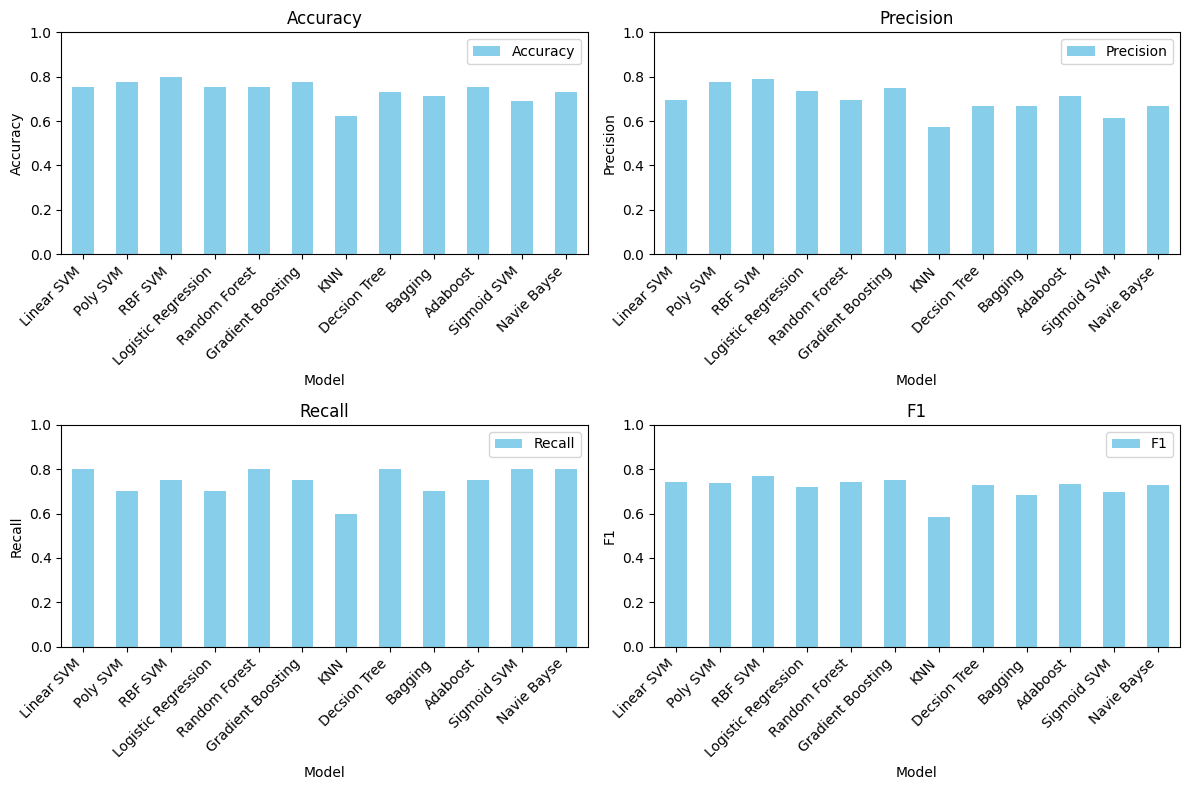

In [17]:
metrics_df = pandas.DataFrame(metrics_list)

# Plot bar charts for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1']
for i, metric in enumerate(metrics_to_plot):
    ax = axes[i // 2, i % 2]
    metrics_df.plot(kind='bar', x='Model', y=metric, ax=ax, color='skyblue')
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
    ax.set_ylim(0, 1)
    
    max_value = 1
    for p in ax.patches:
        percentage = p.get_height() / max_value * 100
        #ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
        #            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
        #            textcoords='offset points')

plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=len(models) + len(bModels), ncols=1, figsize=(8, 6*(len(models) + len(bModels))))

# Define a function to plot ROC curve
def plot_roc_curve(model, name, ax):
    if hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)  # For models with decision_function method
    elif hasattr(model, "predict_proba"):
        if name == "Navie Bayse":
            y_score = model.predict_proba(X_test.toarray())[:, 1]  # For Naive Bayes
        else:
            y_score = model.predict_proba(X_test)[:, 1]  # For models with predict_proba method
    else:
        y_score = model.predict(X_test)  # Use predictions as a fallback
        
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=name).plot(ax=ax)
    ax.set_title(f"ROC Curve for {name}")

for idx, (name, model) in enumerate(models.items()):
    ax = axs[idx]
    plot_roc_curve(model, name, ax)

for idx, (name, model) in enumerate(bModels.items()):
    ax = axs[len(models) + idx]
    plot_roc_curve(model, name, ax)

plt.tight_layout()
plt.show()


NameError: name 'bModels' is not defined

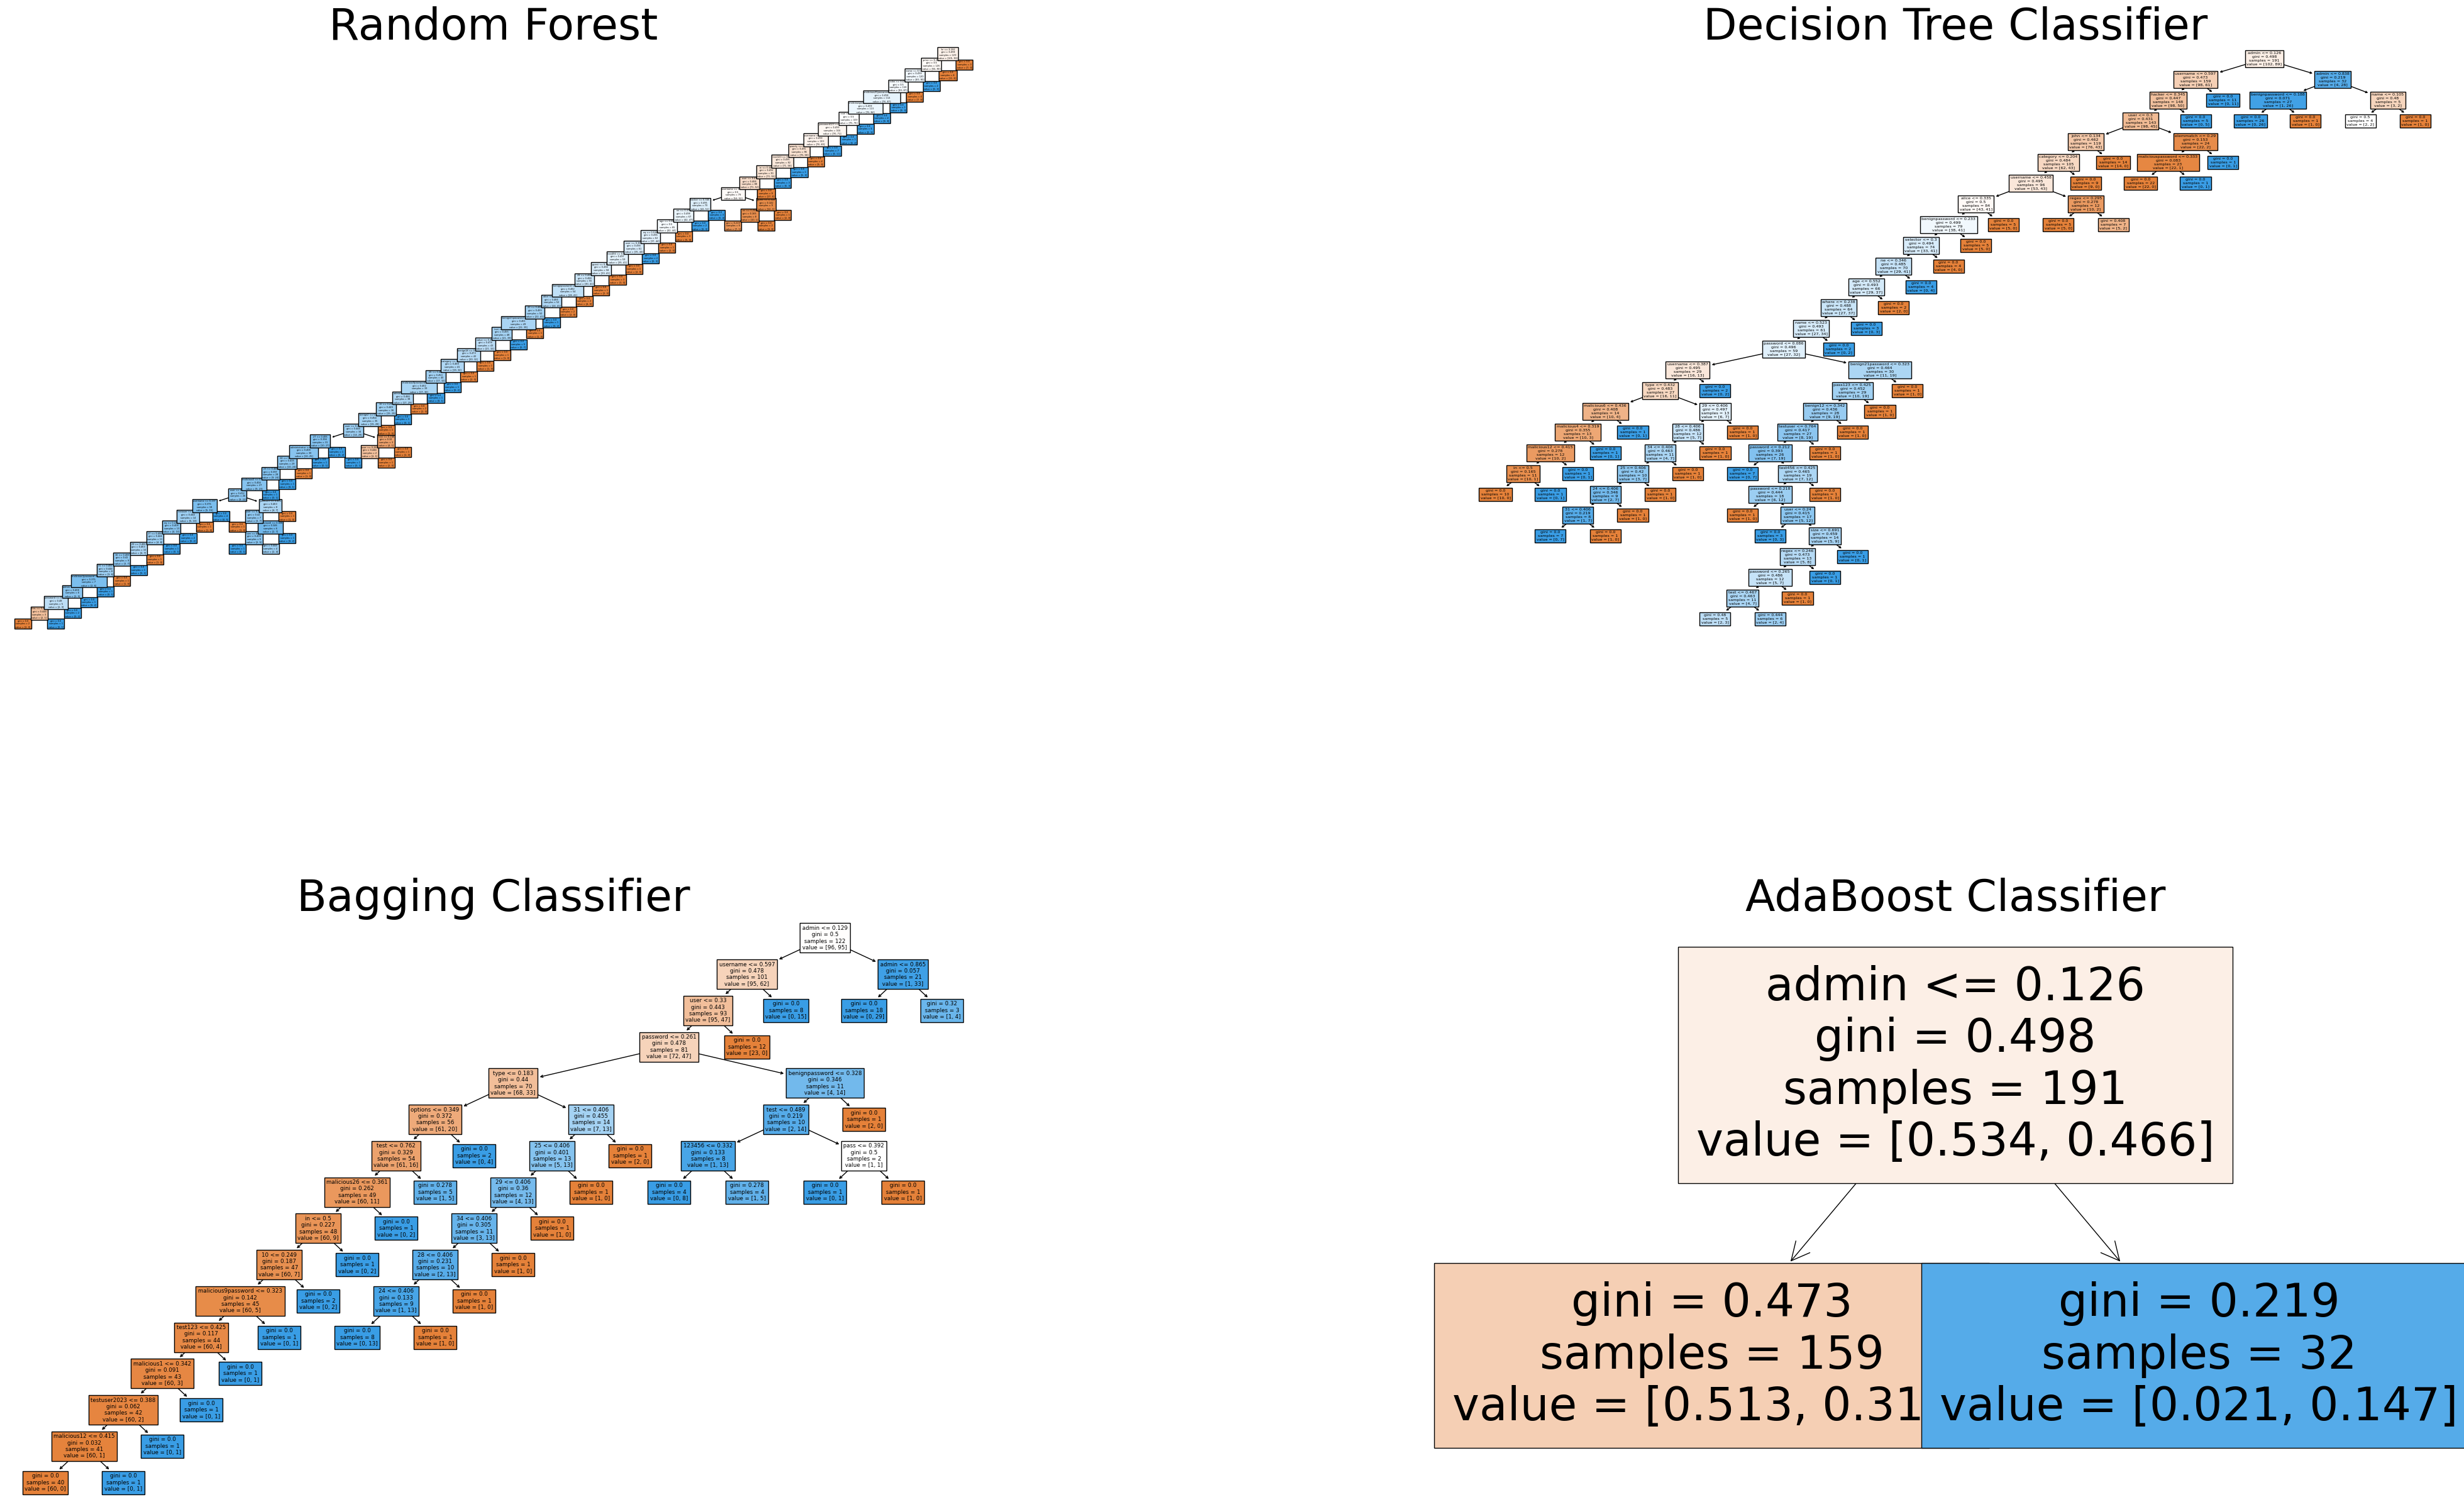

In [ ]:
from sklearn.tree import plot_tree
combined_feature_names = vectorizer.get_feature_names_out()
fig, axes = plt.subplots(2, 2, figsize=(50, 30))

# Plot the first decision tree
plot_tree(randF_A.estimators_[0], ax=axes[0, 0], filled=True, feature_names=combined_feature_names)
axes[0, 0].set_title('Random Forest', fontsize=50)

# Plot the second decision tree
plot_tree(dt_clf, ax=axes[0, 1], filled=True, feature_names=combined_feature_names)
axes[0, 1].set_title('Decision Tree Classifier', fontsize=50)

# Plot the third decision tree
plot_tree(bag_dt.estimators_[0], ax=axes[1, 0], filled=True, feature_names=combined_feature_names)
axes[1, 0].set_title('Bagging Classifier', fontsize=50)

# Plot the fourth decision tree
plot_tree(ada_dt.estimators_[0], ax=axes[1, 1], filled=True, feature_names=combined_feature_names)
axes[1, 1].set_title('AdaBoost Classifier', fontsize=50)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Display the figure
plt.show()

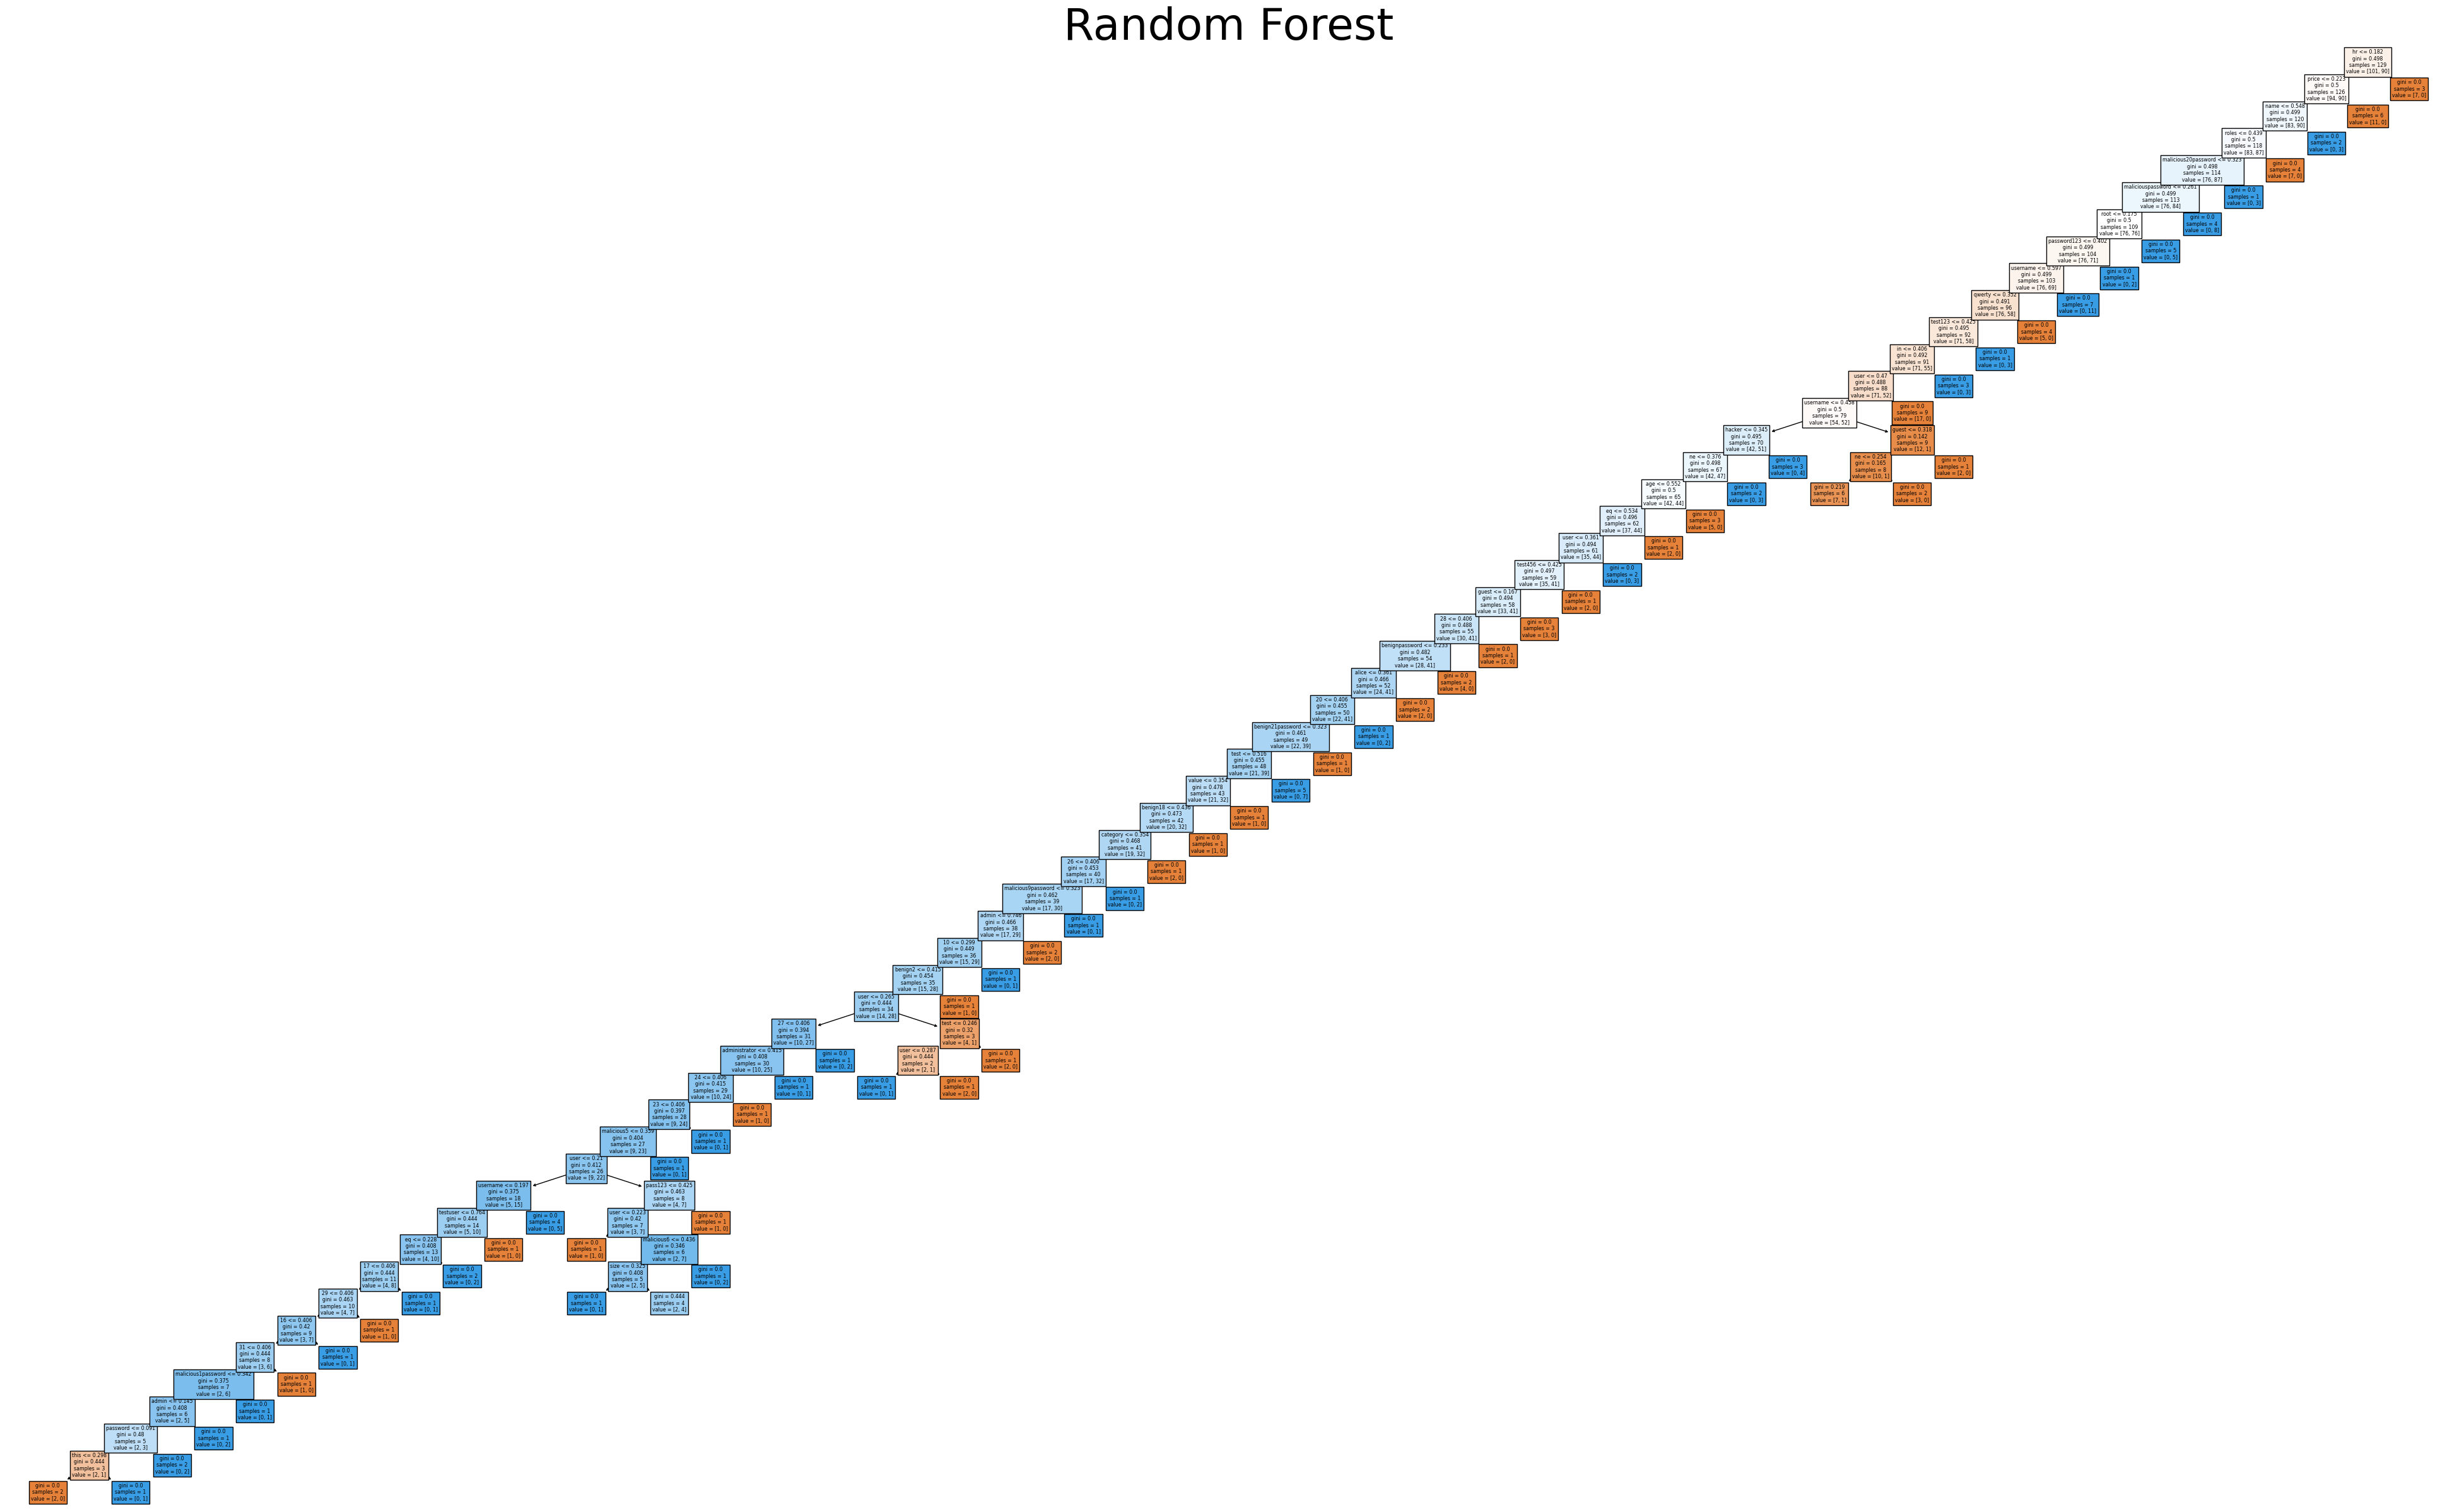

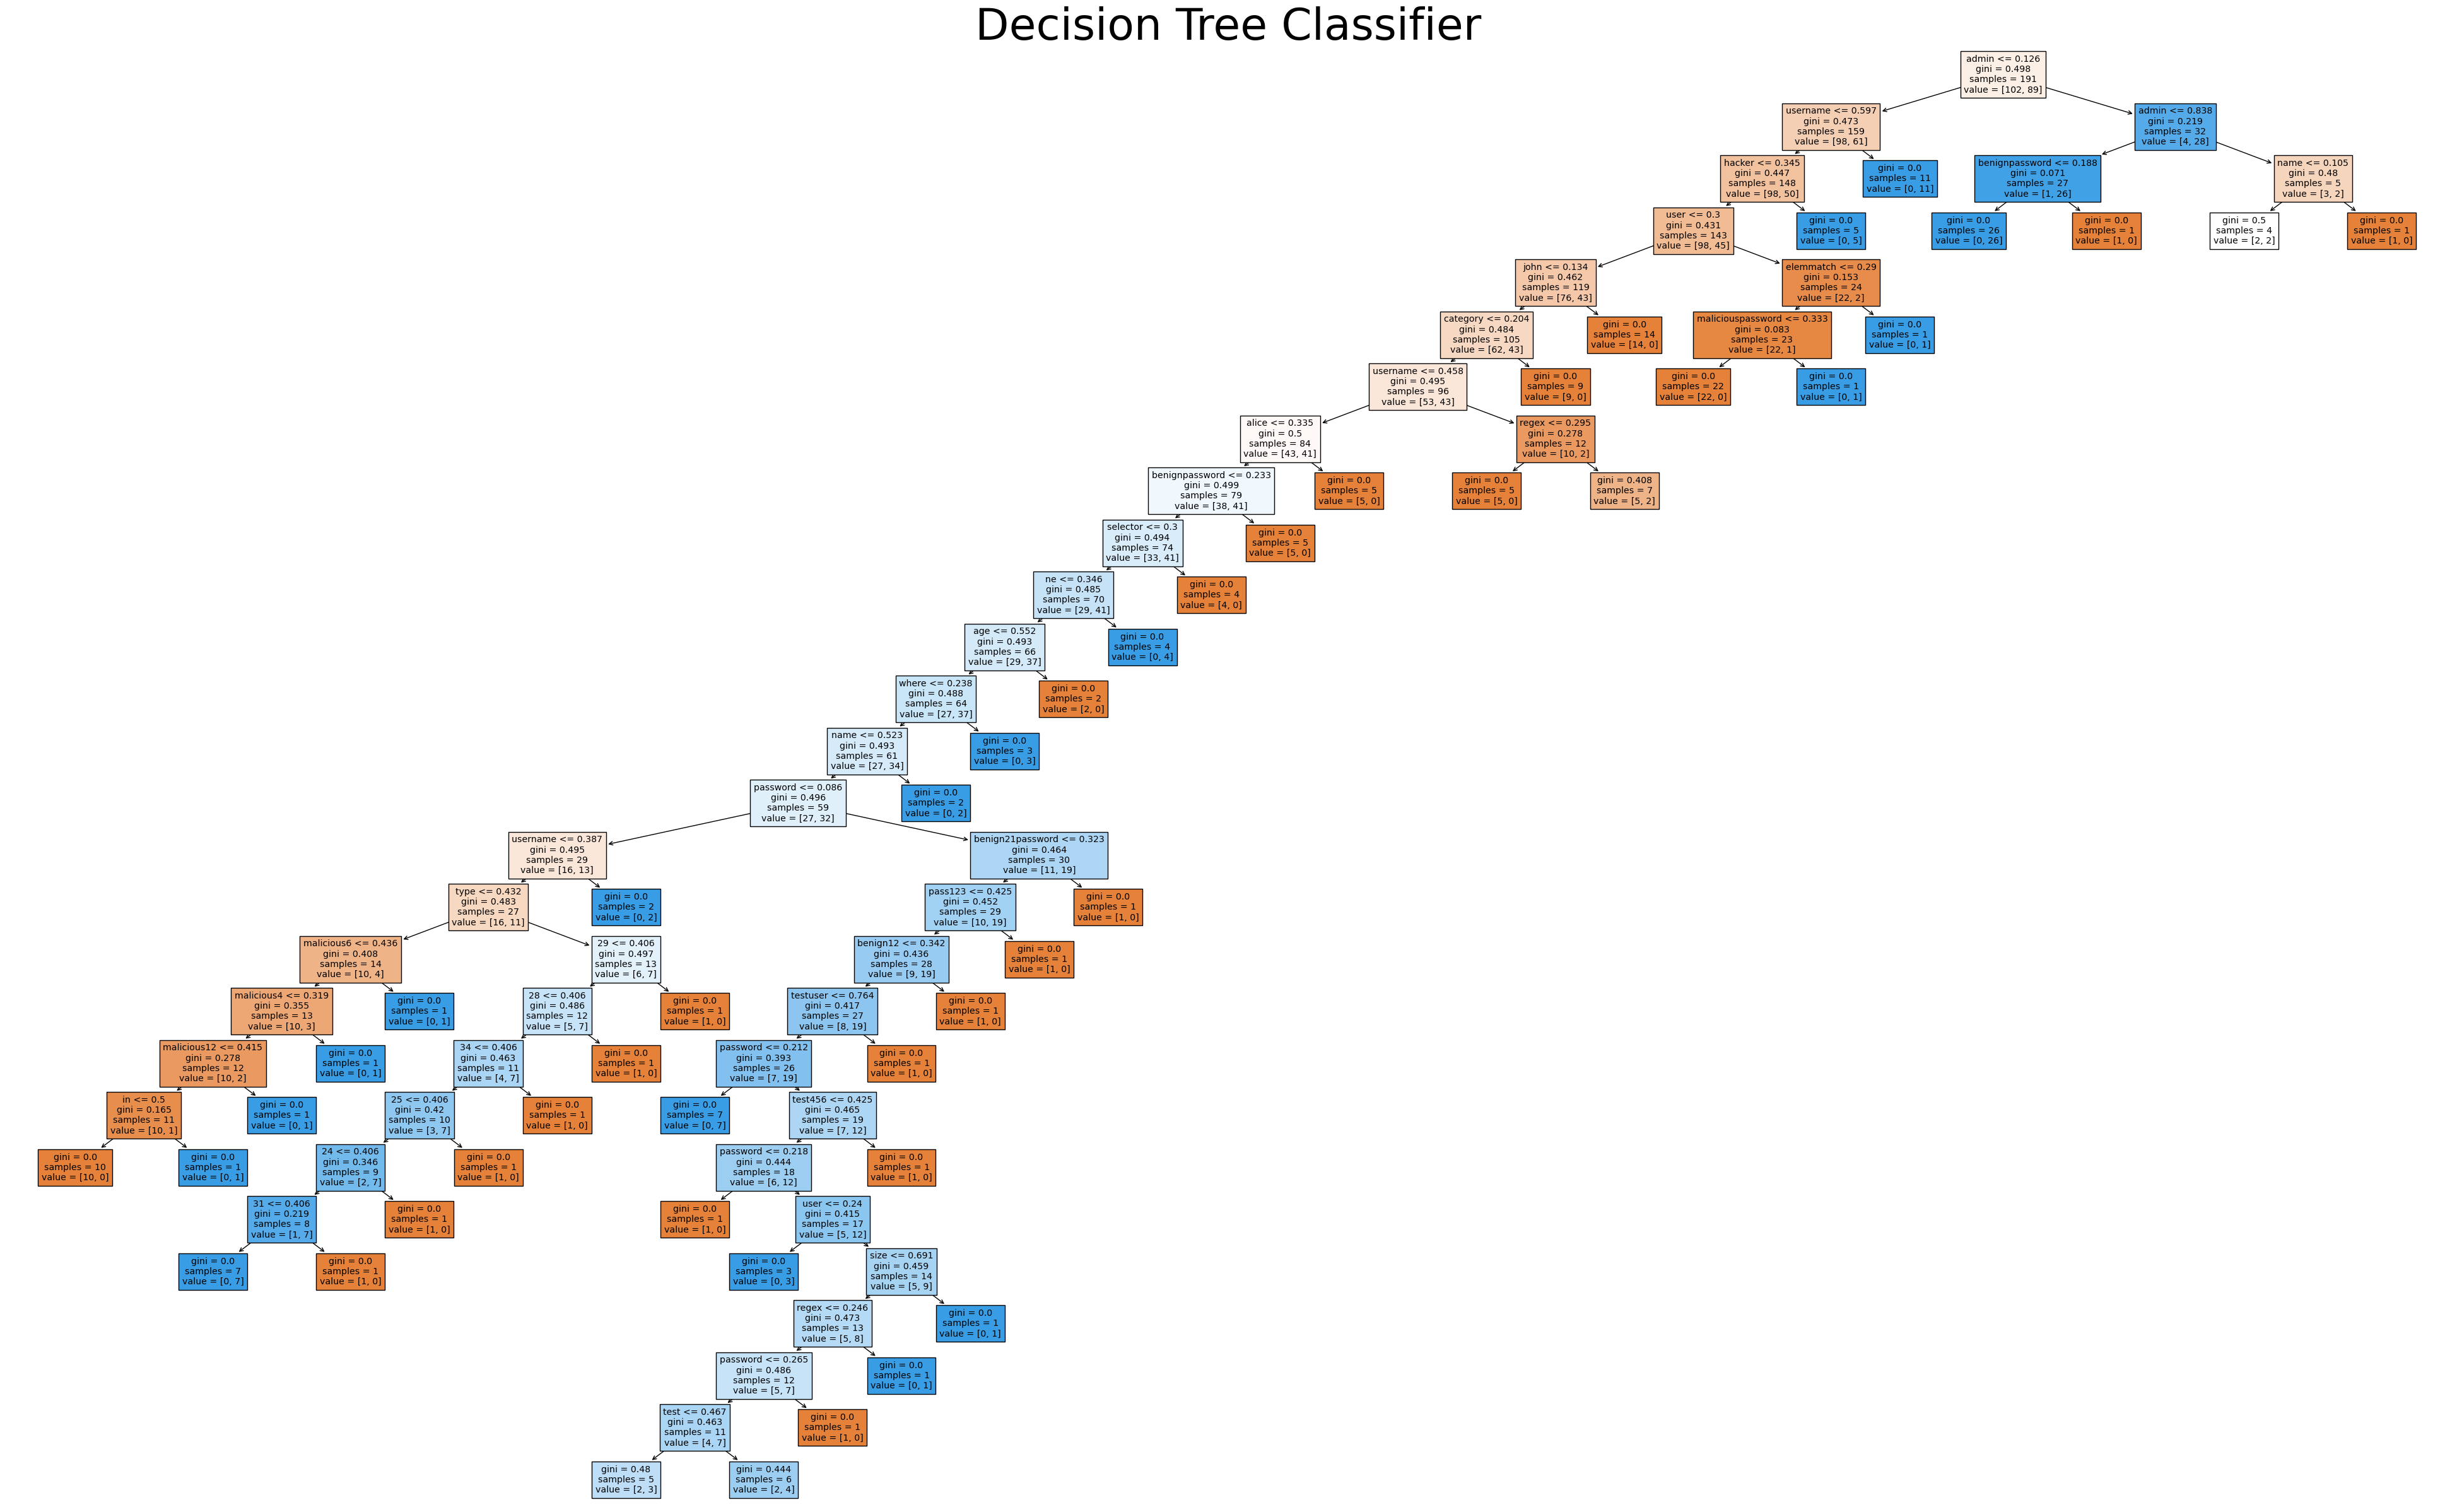

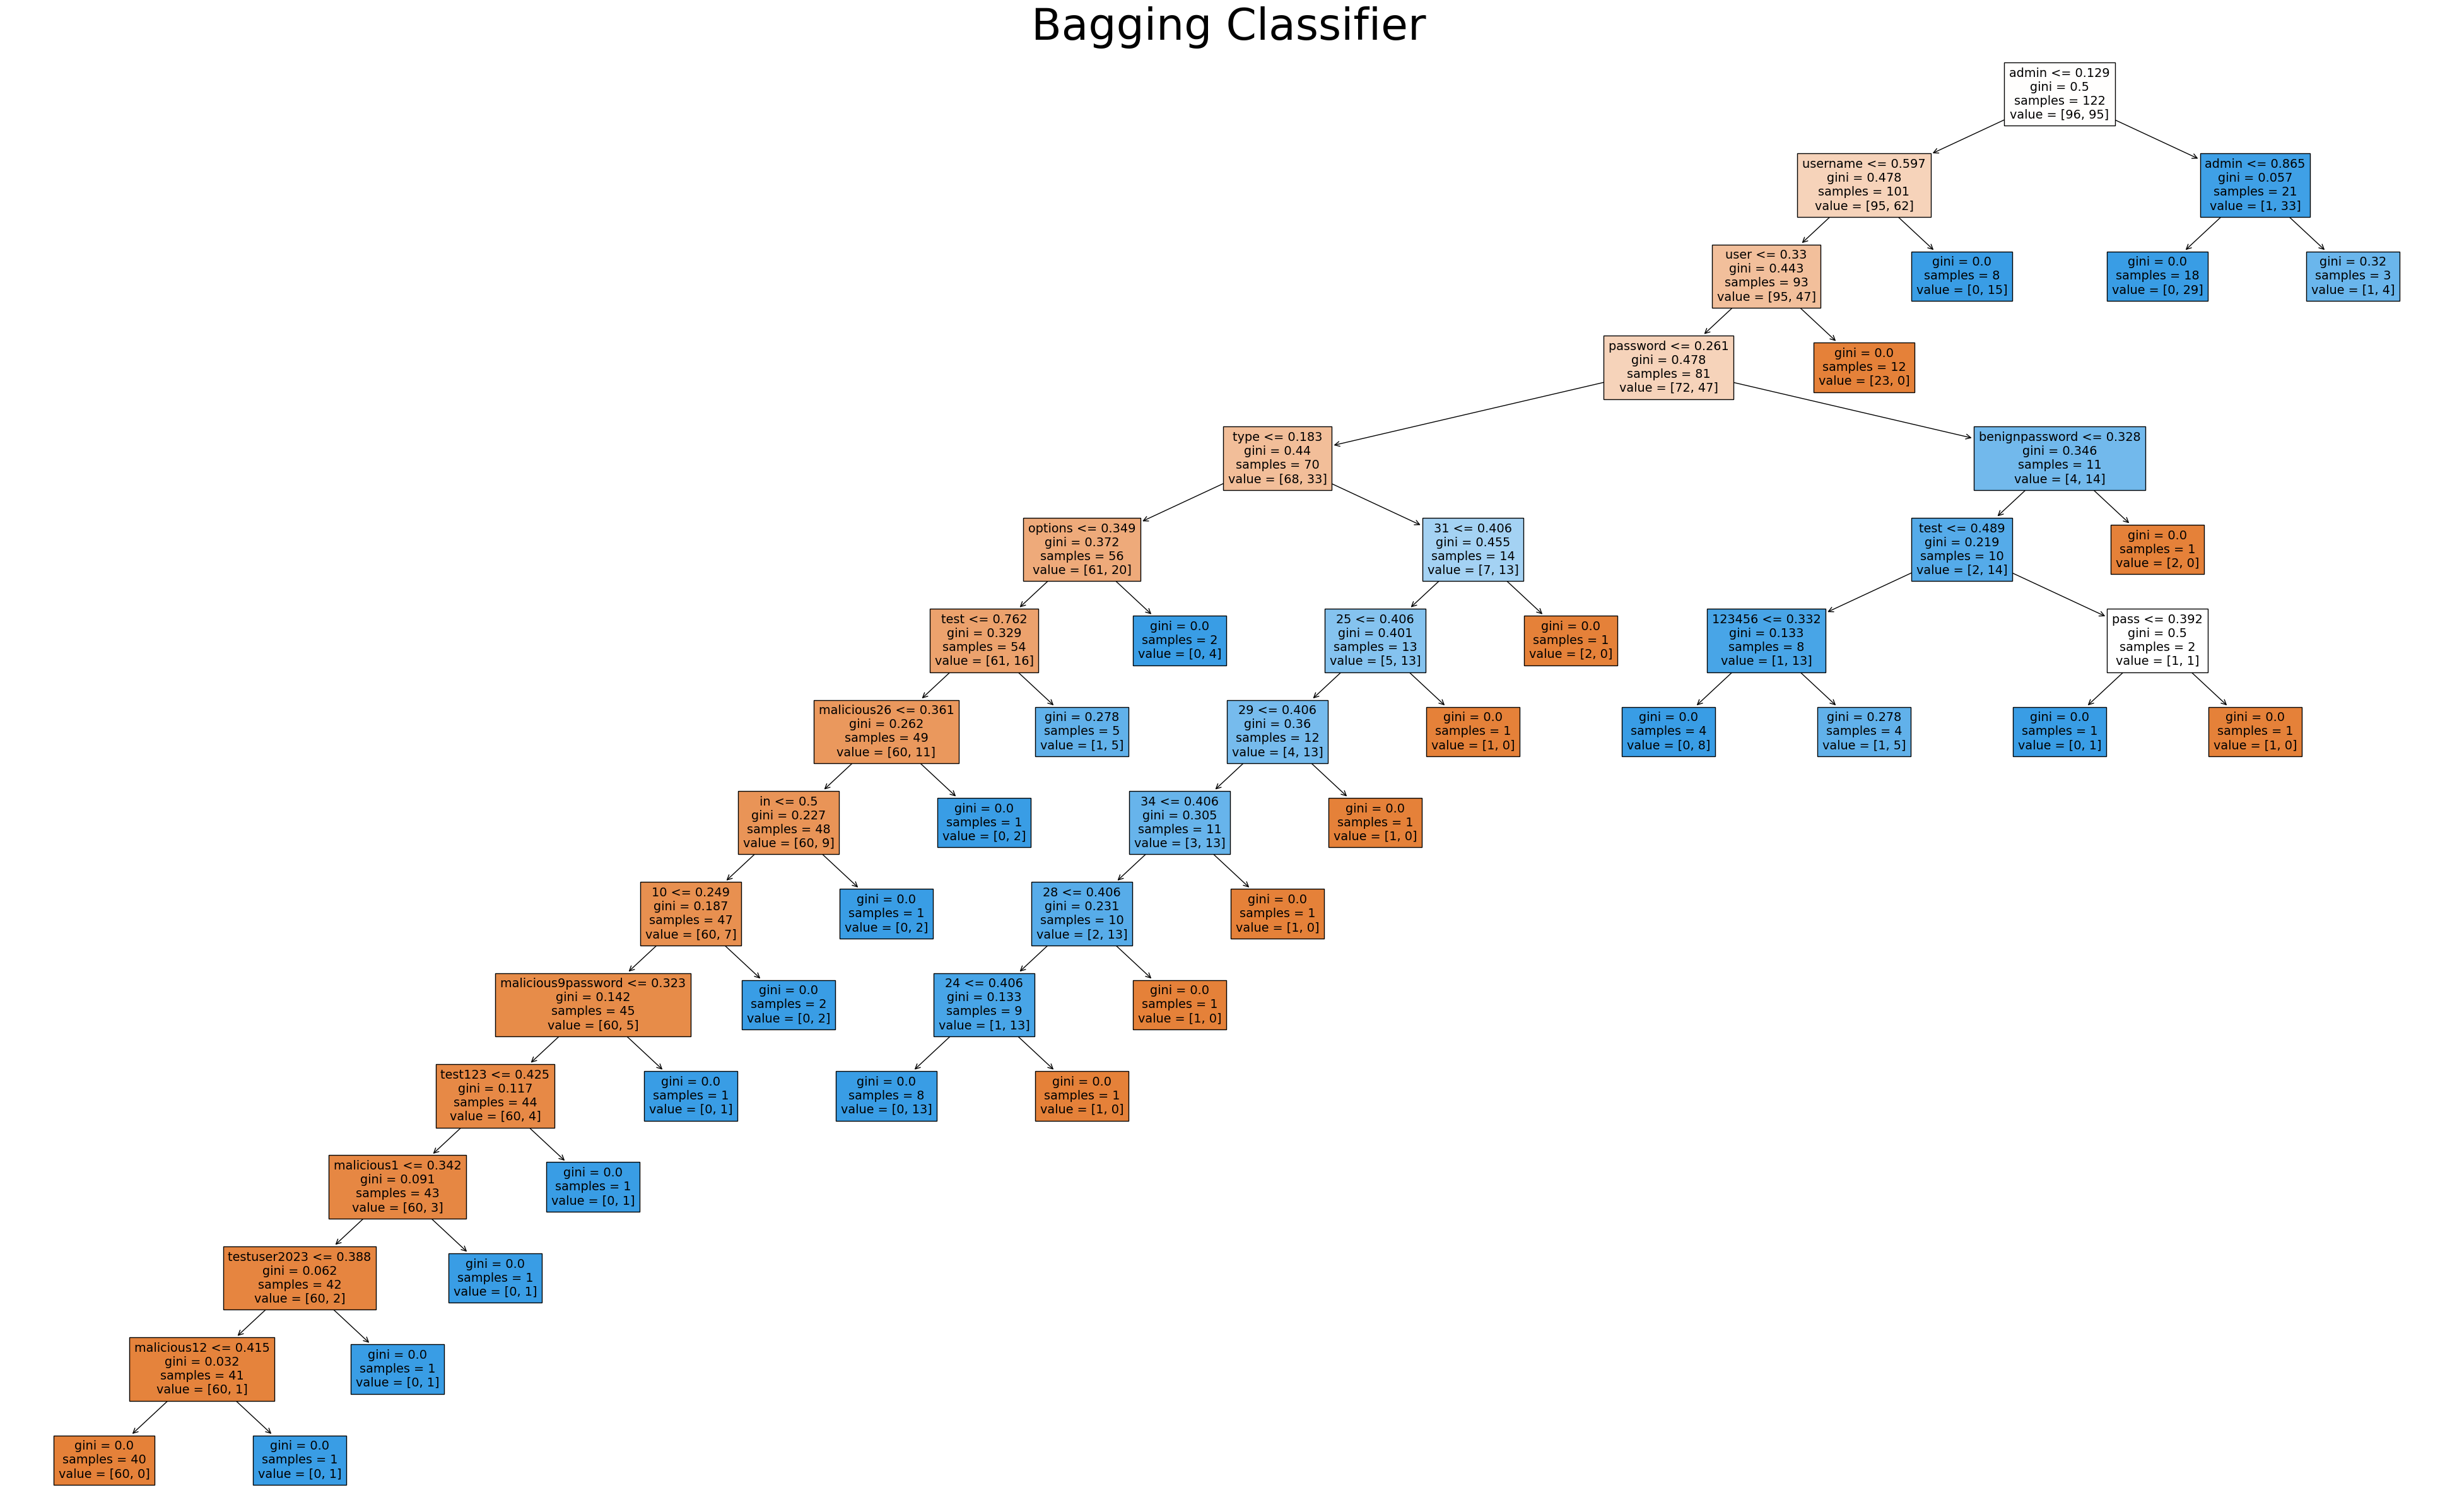

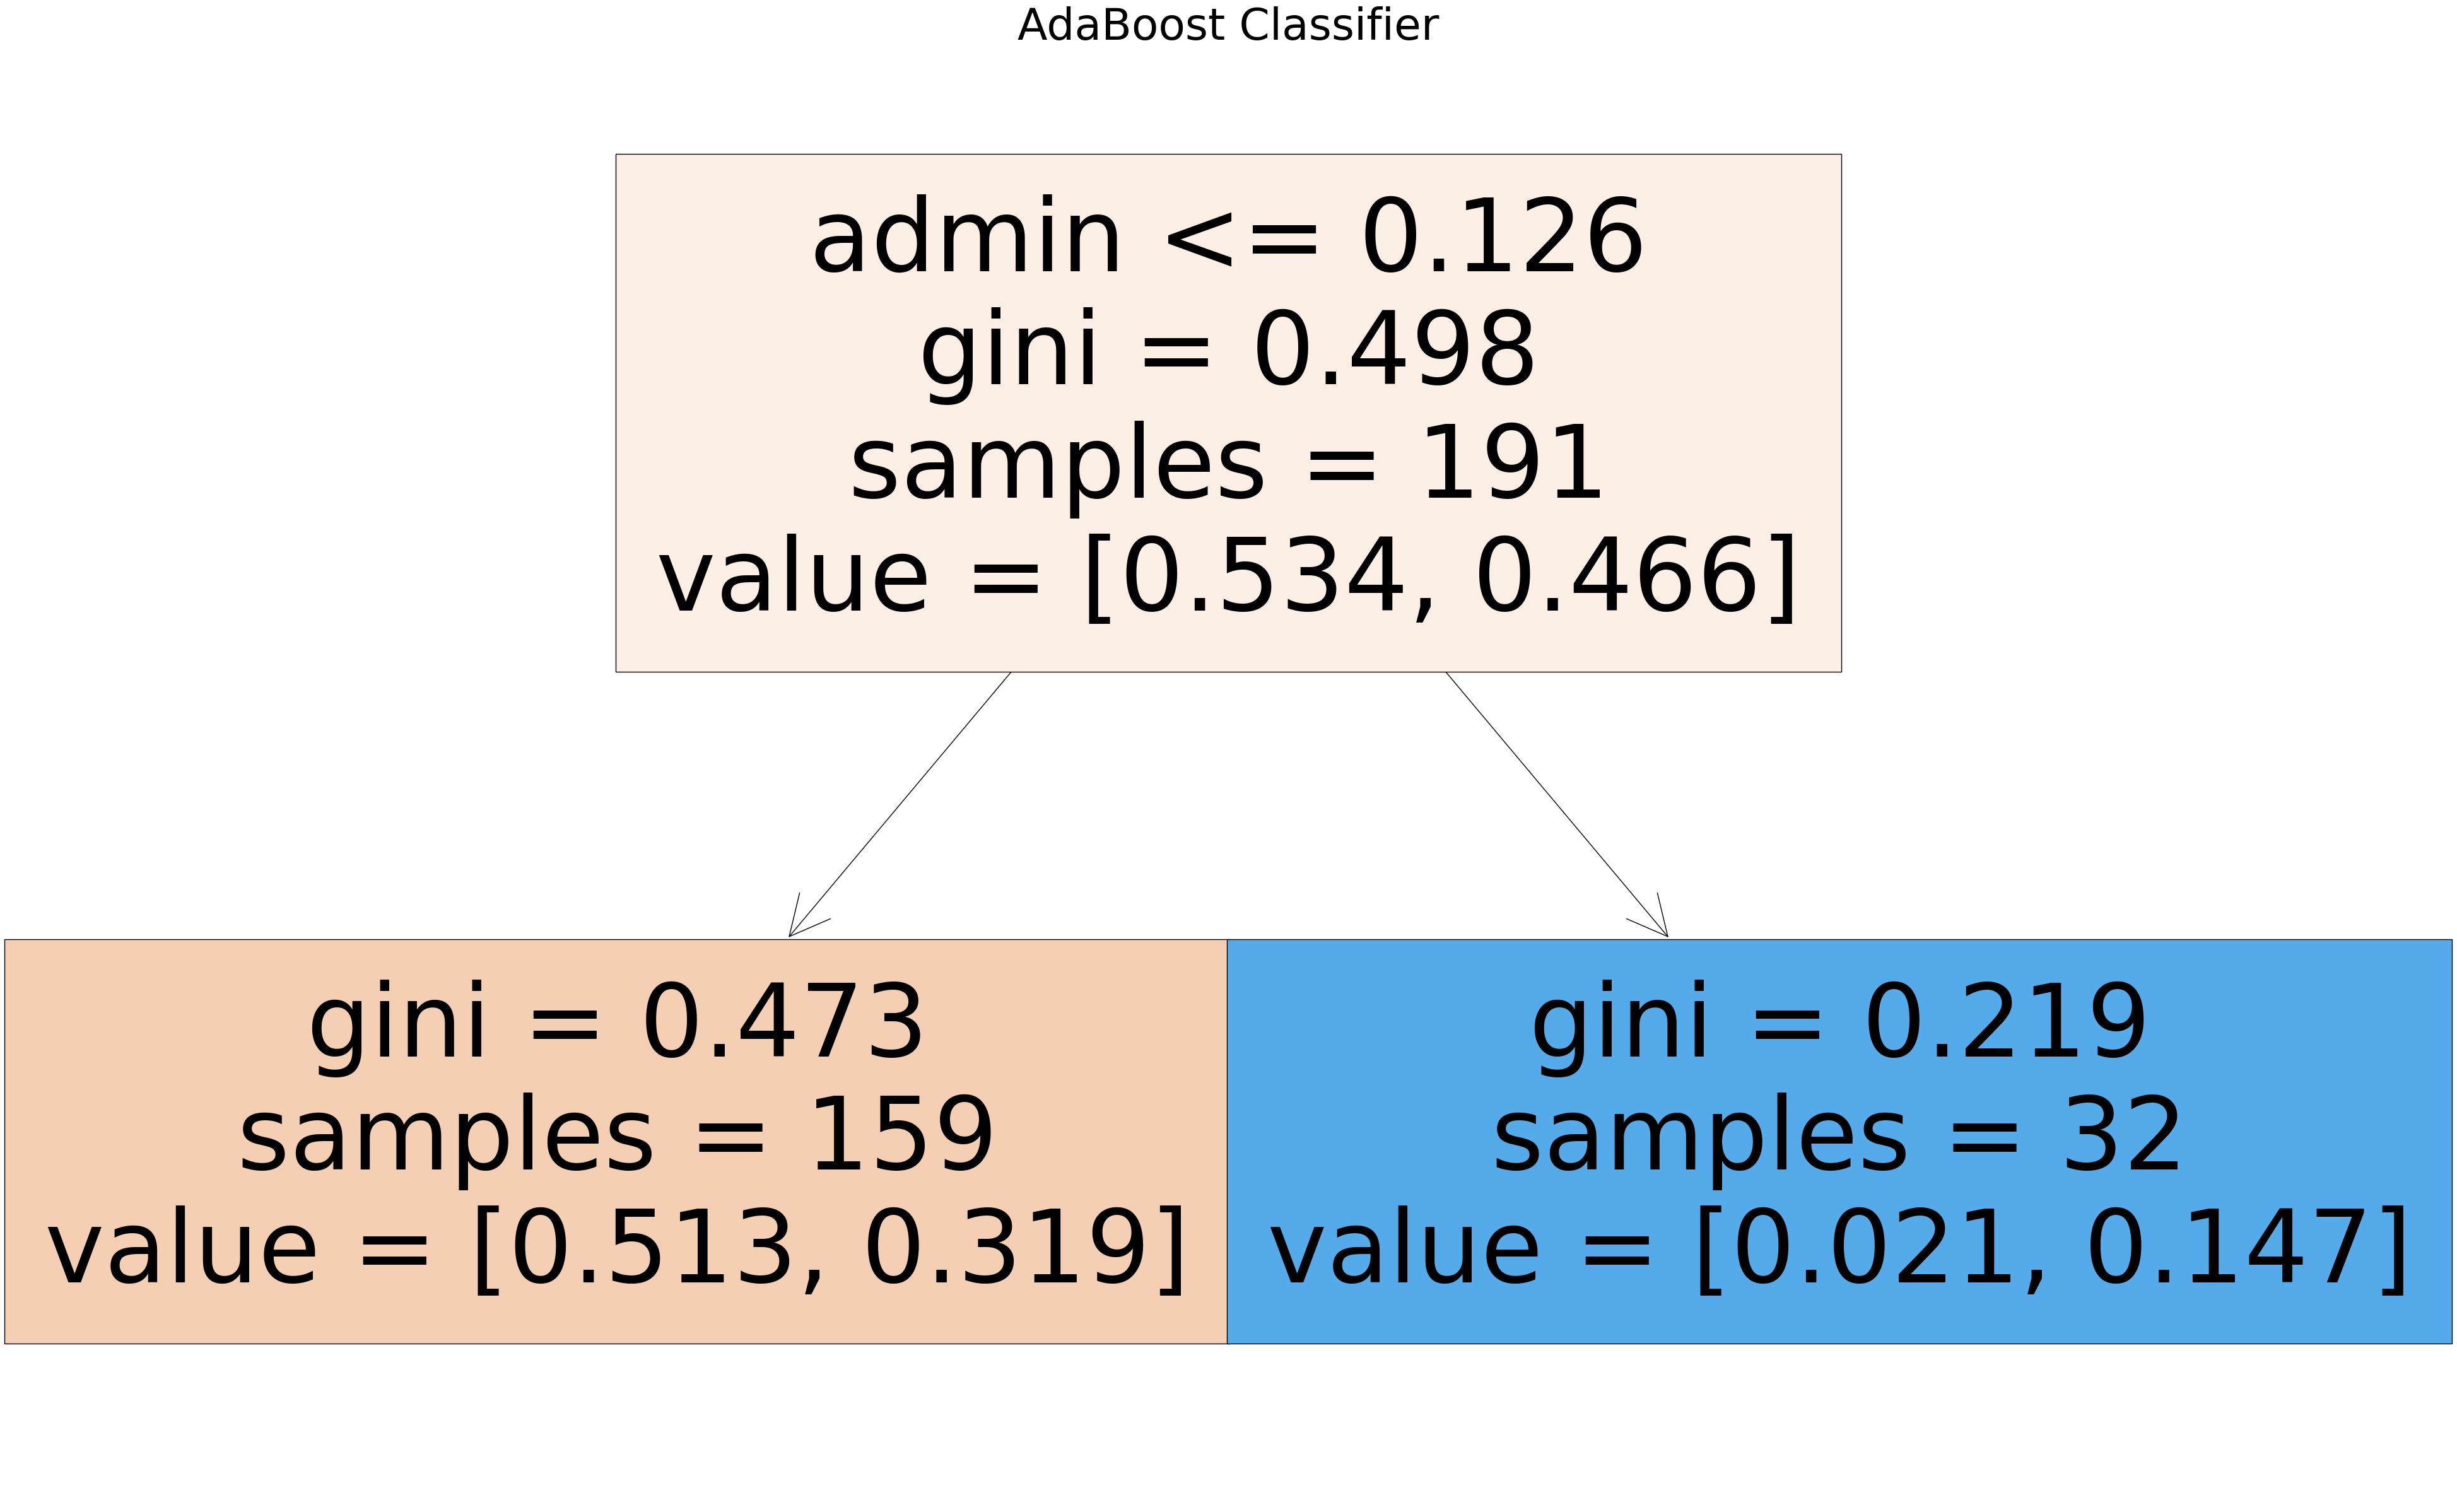

In [ ]:
plt.figure(figsize=(50, 30))
plot_tree(randF_A.estimators_[0], filled=True, feature_names=combined_feature_names)
plt.title('Random Forest', fontsize=50)
plt.show()

# Plot the second decision tree
plt.figure(figsize=(50, 30))
plot_tree(dt_clf, filled=True, feature_names=combined_feature_names)
plt.title('Decision Tree Classifier', fontsize=50)
plt.show()

# Plot the third decision tree
plt.figure(figsize=(50, 30))
plot_tree(bag_dt.estimators_[0], filled=True, feature_names=combined_feature_names)
plt.title('Bagging Classifier', fontsize=50)
plt.show()

# Plot the fourth decision tree
plt.figure(figsize=(50, 30))
plot_tree(ada_dt.estimators_[0], filled=True, feature_names=combined_feature_names)
plt.title('AdaBoost Classifier', fontsize=50)
plt.show()